In [16]:
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_rows', 100)
from shapely import MultiPolygon
import numpy as np


In [5]:
cd ..

d:\


In [6]:
cd WDPA_WDOECM_Jul2024_Public_MYS_shp

d:\WDPA_WDOECM_Jul2024_Public_MYS_shp


In [7]:
df1 = gpd.read_file('WDPA_WDOECM_Jul2024_Public_MYS_shp_0/WDPA_WDOECM_Jul2024_Public_MYS_shp-polygons.shp')
df2 = gpd.read_file('WDPA_WDOECM_Jul2024_Public_MYS_shp_1/WDPA_WDOECM_Jul2024_Public_MYS_shp-polygons.shp')
df3 = gpd.read_file('WDPA_WDOECM_Jul2024_Public_MYS_shp_2/WDPA_WDOECM_Jul2024_Public_MYS_shp-polygons.shp')

In [8]:
data = pd.concat([df1,df2,df3])
data.shape

(485, 31)

In [10]:
def split_multipolygon(multipolygon):
    polygons_l = []
    if type(multipolygon) == MultiPolygon:
        for poly in multipolygon.geoms:
            polygons_l.append(poly)
        return polygons_l
    else:
        return multipolygon

In [11]:


def convert_to_array(row):
    if type(row) != MultiPolygon:
        return list(map(list, row.exterior.coords))
    else:
        a = []
        for poly in row.geoms:
            a.append(list(map(list, poly.exterior.coords)))
        return a

In [31]:
# data['geojson'] = data['geometry'].apply(split_multipolygon)
# data = data.explode('geojson')
data['geojson'] = data['geometry'].apply(convert_to_array)
data['centroid'] = data['geometry'].apply(lambda x: x.centroid)
data['lon'] = data['centroid'].apply(lambda x: x.x)
data['lat'] = data['centroid'].apply(lambda x: x.y)

In [32]:
data.shape

(485, 35)

In [33]:
data

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry,geojson,centroid,lat,lon
0,785.0,785,1,Kinabalu Park,Kinabalu Park,State Park,State Park,National,II,Not Applicable,...,Not Reported,MYS,MYS,Not Applicable,Not Applicable,"POLYGON ((116.56802 6.49486, 116.59828 6.49386...","[[116.56801691299995, 6.494857425000021], [116...",POINT (116.62721 6.19652),6.196520,116.627207
1,786.0,786,1,Similajau National Park,Similajau National Park,National Park,National Park,National,II,Not Applicable,...,Not Reported,MYS,MYS,Not Applicable,Not Applicable,"POLYGON ((113.12124 3.31088, 113.13789 3.33705...","[[113.12123628899997, 3.310880121000025], [113...",POINT (113.22406 3.41871),3.418714,113.224056
2,787.0,787,1,Gunung Mulu National Park,Gunung Mulu National Park,National Park,National Park,National,II,Not Applicable,...,Not Reported,MYS,MYS,Not Applicable,Not Applicable,"POLYGON ((114.80213 4.16403, 114.80784 4.2002,...","[[114.802133218, 4.1640345320000165], [114.807...",POINT (114.93201 4.07839),4.078391,114.932008
3,788.0,788,1,Klias,Klias Protection Forest,Forest Reserve,Forest Reserve,National,Ia,Not Applicable,...,Not Reported,MYS,MYS,Not Applicable,Not Applicable,"POLYGON ((115.67447 5.30466, 115.67007 5.30448...","[[115.67447278600002, 5.304658320999977], [115...",POINT (115.62975 5.29658),5.296577,115.629749
4,789.0,789,1,Pulau Tiga Park,Pulau Tiga Park,State Park,State Park,National,II,Not Applicable,...,Not Reported,MYS,MYS,Not Applicable,Not Applicable,"POLYGON ((115.73019 5.90843, 115.66355 5.67018...","[[115.73018599, 5.908429591000015], [115.66354...",POINT (115.66325 5.78048),5.780478,115.663254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,555705837.0,555705837,1,Pulau Labas Marine Park,Pulau Labas Marine Park,Marine Park,Marine Park,National,II,Not Applicable,...,MY-06,MYS,MYS,Not Applicable,Not Applicable,"POLYGON ((104.10008 2.90125, 104.10055 2.8998,...","[[104.10007894199998, 2.901245502999984], [104...",POINT (104.06669 2.88888),2.888885,104.066692
157,555705838.0,555705838,1,Pulau Ceben Marine Park,Pulau Ceben Marine Park,Marine Park,Marine Park,National,II,Not Applicable,...,MY-06,MYS,MYS,Not Applicable,Not Applicable,"POLYGON ((104.13193 2.93579, 104.13194 2.93503...","[[104.131932705, 2.9357905570000185], [104.131...",POINT (104.09731 2.93413),2.934131,104.097309
158,555705839.0,555705839,1,Pulau Jahat Marine Park,Pulau Jahat Marine Park,Marine Park,Marine Park,National,II,Not Applicable,...,MY-06,MYS,MYS,Not Applicable,Not Applicable,"POLYGON ((104.19689 2.66812, 104.19696 2.6666,...","[[104.19688907900002, 2.6681199039999797], [10...",POINT (104.16224 2.66554),2.665541,104.162241
159,555705840.0,555705840,1,Pulau Tulai Marine Park,Pulau Tulai Marine Park,Marine Park,Marine Park,National,II,Not Applicable,...,MY-06,MYS,MYS,Not Applicable,Not Applicable,"POLYGON ((104.13779 2.93643, 104.13885 2.93534...","[[104.13779098499998, 2.936429345000022], [104...",POINT (104.10655 2.91127),2.911267,104.106551


<Axes: >

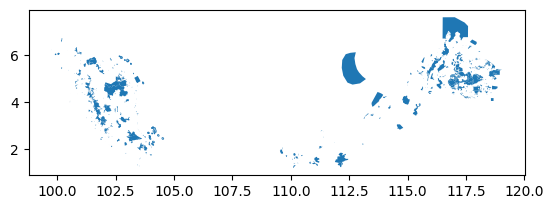

In [14]:
data.plot()

In [34]:
#excel limit 32k characters per cell
data.drop(['geometry', 'centroid'], axis=1).to_csv('ductt_test_geojson.csv', index=False)

In [30]:
data.to_file('ductt_test_geojson.json', driver="GeoJSON")

'd:\\WDPA_WDOECM_Jul2024_Public_MYS_shp'

In [35]:
# KMZ

In [55]:
gdf = gpd.read_file('Copy+1+of+KLSM+Master+MAP.csv')
gdf['type'] = gdf['geometry'].apply(lambda x: x.geom_type)
gdf['centroid'] = gdf['geometry'].apply(lambda x: x.centroid)
gdf['lon'] = gdf['centroid'].apply(lambda x: x.x)
gdf['lat'] = gdf['centroid'].apply(lambda x: x.y)

In [57]:
gdf.drop(['geometry', 'centroid'], axis=1).to_csv('ductt_test_geojson_2.csv', index=False)